# Foreground Extraction Using OpenCV-Python

Part 2

## By *Tobias Reaper*

---

In [1]:
# === Imports === #
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:
# === Set up the image === #
# img = cv2.imread("test_images/12.png")
img = cv2.imread("test_images/glass1.jpg")
mask = np.zeros(img.shape[:2], np.uint8)

In [16]:
# === Set up bg and fg models === #
bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

In [17]:
img.shape

(384, 512, 3)

In [18]:
# === Define the rectangle === #
# In this case, the entire image

# Rectangle defined by x, y, width, height
rect = (
    img.shape[0]//10,
    img.shape[0]//10,
    img.shape[0] - 10,
    img.shape[1] - 10
)

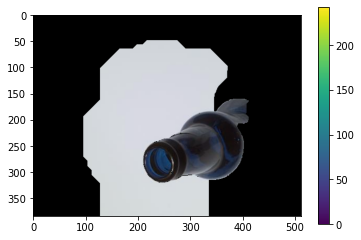

In [19]:
# === Make the cut and grab that ish!~ === #

cv2.grabCut(img, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_masked = img * mask2[:, :, np.newaxis]

plt.imshow(img_masked)
plt.colorbar()
plt.show()

---

## Manual Rectangles

In [27]:
# === Set up the glass bottle image + mask === #
img2 = cv2.imread("test_images/glass1.jpg")
mask = np.zeros(img2.shape[:2], np.uint8)

# === Set up bg and fg models === #
bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

# === Define the rectangle === #
# This time testing out a manual rectangle
# Rectangle defined by x, y, width, height
rect = (200, 150, 300, 200)

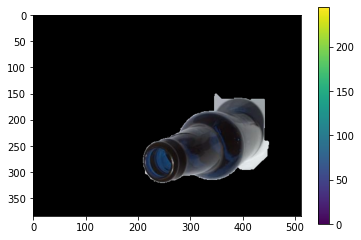

In [28]:
# === Make the cut and see the results === #

cv2.grabCut(img2, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2_masked = img2 * mask2[:, :, np.newaxis]

plt.imshow(img2_masked)
plt.colorbar()
plt.show()

The result is much much better than without the rectangle. However, figuring out where the object is in the screen is what this step in the process is trying to automate.

I'll try it on the can as well, for good measure. After this, I'll look into using the detectron2 segmentation algorithm to solve this problem.

---

In [31]:
# === Set up the can image + mask === #
img3 = cv2.imread("test_images/12.png")
mask = np.zeros(img3.shape[:2], np.uint8)

# === Define the rectangle === #
# This time testing out a manual rectangle
# Rectangle defined by x, y, width, height
rect = (80, 100, 480, 420)

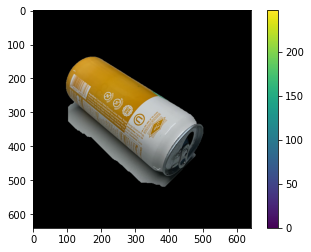

In [34]:
# === Make the cut and see the results === #

cv2.grabCut(img3, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img3_masked = img3 * mask2[:, :, np.newaxis]

plt.imshow(img3_masked)
plt.colorbar()
plt.show()

This also gave great results that, if achieved without manual input, would likely by acceptable for use in the pipeline. The fact remains, however, that the GrabCut algorithm seems to not do well with larger boxes / images.

I can continue to tune the parameters of the method to see if the results without manual intervention can be improved.

---

## Detectron2

Facebook AI Research (FAIR) released the code for the second version of their object detection library, Detectron. Using this library to get the coordinates of the object(s) in the image has the benefit of being able to recognize objects. The performance of the library on classes of objects on which it was not trained will have to be determined and the value of the method gauged against other possible alternatives.